In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [8]:
pd.options.display.max_rows = 10

In [7]:
pd.options.display.max_columns = None

# Importing normal_activity_subset.pkl

In [5]:
newpath = 'preparedData'

In [9]:
normal_active_customers_df= pd.read_pickle(os.path.join(newpath,'normal_activity_subset.pkl'))

In [14]:
normal_active_customers_df.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,num_of_dependants,martital_status,income,regions,user_activity_flag
0,0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity


In [15]:
normal_active_customers_df.shape

(15094953, 35)

# Merging normal_active customers and departments_df

In [10]:
# Importing 'departments_wrangled' dataset

departments_df= pd.read_csv(os.path.join(newpath,'departments_wrangled.csv'))

In [11]:
# Check output
departments_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
...,...,...
16,17,household
17,18,babies
18,19,snacks
19,20,deli


In [12]:
# Change 'Unnamed:0' column name to 'department_id'
departments_df.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [13]:
# Check the output
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [16]:
# Merging normal activite customers and departments_df on a key column 'department_id'
active_customers_departs = normal_active_customers_df.merge(departments_df, on = 'department_id')

In [17]:
#checking the output
active_customers_departs.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,num_of_dependants,martital_status,income,regions,user_activity_flag,department
0,0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages


In [18]:
#checking the dimensions
active_customers_departs.shape

(15094953, 36)

In [19]:
# Exporting merged dataframe as 'active_customers_departments_merged.pkl'
active_customers_departs.to_pickle(os.path.join(newpath,'active_customers_departments_merged.pkl'))

# Creating Customer Profiles

In [20]:
# Import 'active_customers_departments_merged.pkl'
active_customers_departs_df= pd.read_pickle(os.path.join(newpath,'active_customers_departments_merged.pkl'))

In [21]:
# Check the output
active_customers_departs_df.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,num_of_dependants,martital_status,income,regions,user_activity_flag,department
0,0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages


In [22]:
# Check dimensions
active_customers_departs_df.shape

(15094953, 36)

# Profiles based on 'AGE'

In [23]:
# Descriptive statistics for 'age' column 
active_customers_departs_df['age'].describe()

count    1.509495e+07
mean     4.954049e+01
std      1.848507e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.600000e+01
max      8.100000e+01
Name: age, dtype: float64

#As we can see from the above output the 
Minimum age is 18 years, 
Maximum age is 81 years, 
average age is 49 years. 
with this output, we can create age groups as follows: 
- 18-29 years old,
- 30-49 years old,
- 50-64 years old,
- 65-81 years old.

In [24]:
# Creating a flag for 18-29 years old
active_customers_departs_df.loc[(active_customers_departs_df['age'] >=18) & (active_customers_departs_df['age'] <30), 'age_group'] = '18-29 years old'

/var/folders/n3/cnsw2_q5653501p8bw3zft6h0000gp/T/ipykernel_12185/3972834327.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18-29 years old' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  active_customers_departs_df.loc[(active_customers_departs_df['age'] >=18) & (active_customers_departs_df['age'] <30), 'age_group'] = '18-29 years old'


In [25]:
# Creating a flag for 30-49 years old
active_customers_departs_df.loc[(active_customers_departs_df['age'] >=30) & (active_customers_departs_df['age'] <50), 'age_group'] = '30-49 years old'

In [26]:
# Creating a flag for 50-64 years old
active_customers_departs_df.loc[(active_customers_departs_df['age'] >=50) & (active_customers_departs_df['age'] <65), 'age_group'] = '50-64 years old'

In [27]:
# Create a flag for 65-81 years old
active_customers_departs_df.loc[(active_customers_departs_df['age'] >=65) & (active_customers_departs_df['age'] <=81), 'age_group'] = '65-81 years old'

In [28]:
#Checking the output
active_customers_departs_df['age_group'].value_counts().sort_index()

age_group
18-29 years old    2820316
30-49 years old    4736433
50-64 years old    3516825
65-81 years old    4021379
Name: count, dtype: int64

# Distribution chart for 'age_group'

In [ ]:
#Creating distribution chart for 'age_groups'


(array([0, 1, 2, 3]),
 [Text(0, 0, '18-29 years old'),
  Text(1, 0, '30-49 years old'),
  Text(2, 0, '50-64 years old'),
  Text(3, 0, '65-81 years old')])

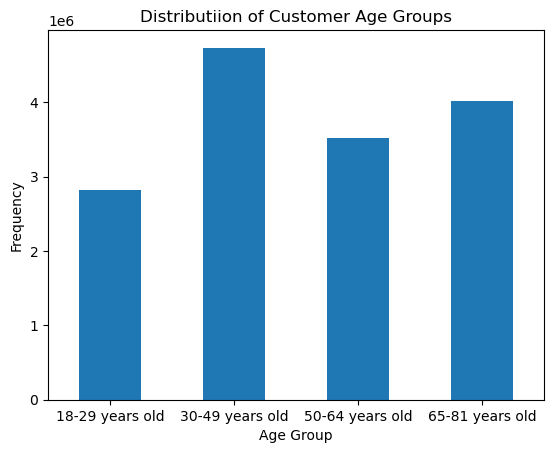

In [29]:
bar_age_group_distrbn = active_customers_departs_df['age_group'].value_counts().sort_index().plot.bar()

plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distributiion of Customer Age Groups')

plt.xticks(rotation = 360)

In [38]:
# Export bar chart
bar_age_group_distrbn.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_age_group_distribution'))


# Aggregation of 'prices' and 'order_number' for age groups

In [39]:
# Aggregating 'order_number' and 'prices' for age groups
active_customers_departs_df.groupby('age_group').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number             prices              
                        mean max min       mean      max  min
age_group                                                    
18-29 years old    17.944623  99   1  11.765285  99999.0  1.0
30-49 years old    17.873452  99   1  11.247938  99999.0  1.0
50-64 years old    17.809453  99   1  11.076499  99999.0  1.0
65-81 years old    17.858813  99   1  11.463197  99999.0  1.0

# Profiles based on 'Income'

In [40]:
# Descriptive statistics for 'age' column 
active_customers_departs_df['income'].describe()

count    1.509495e+07
mean     9.958040e+04
std      4.335246e+04
min      2.599100e+04
25%      6.719800e+04
50%      9.674100e+04
75%      1.279260e+05
max      5.939010e+05
Name: income, dtype: float64

--- Mean = 99,655, 
    Min = 25,903, 
    Max = 593,901. 
Income can be divided into the following categories:
     - low = <65,000,
     - medium = 65,001-145,000, 
     - high = 145,001+

In [41]:
# Creating low income flag
active_customers_departs_df.loc[active_customers_departs_df['income'] <= 65000, 'income_group'] = 'Low income'

/var/folders/n3/cnsw2_q5653501p8bw3zft6h0000gp/T/ipykernel_12185/2336374064.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  active_customers_departs_df.loc[active_customers_departs_df['income'] <= 65000, 'income_group'] = 'Low income'


In [43]:
# Creating medium income flag
active_customers_departs_df.loc[(active_customers_departs_df['income'] > 65000) & (active_customers_departs_df['income'] <= 145000), 'income_group'] = 'Medium income'

In [44]:
# Creating low income flag
active_customers_departs_df.loc[active_customers_departs_df['income'] > 145000, 'income_group'] = 'High income'

In [45]:
# Checking the output
active_customers_departs_df['income_group'].value_counts()

income_group
Medium income    9256022
Low income       3490999
High income      2347932
Name: count, dtype: int64

# Distribution chart for 'income_group'

(array([0, 1, 2]),
 [Text(0, 0, 'Medium income'),
  Text(1, 0, 'Low income'),
  Text(2, 0, 'High income')])

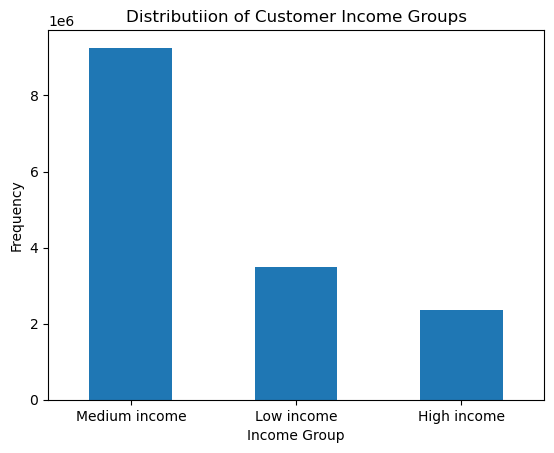

In [46]:
# Create distribution chart for 'income_group'
bar_income_group_distr_df = active_customers_departs_df['income_group'].value_counts().plot.bar()

plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.title('Distributiion of Customer Income Groups')

plt.xticks(rotation = 360)

In [47]:
# Export bar chart
bar_income_group_distr_df.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_income_group_distribution.png'))


# Aggregate Prices and orders for income_groups

In [48]:
# Aggregating 'order_number' and 'prices' for income groups
active_customers_departs_df.groupby('income_group').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number             prices              
                      mean max min       mean      max  min
income_group                                               
High income      17.993330  99   1  26.149188  99999.0  1.0
Low income       17.545395  99   1   7.253349  14900.0  1.0
Medium income    17.957782  99   1   9.160625  99999.0  1.0

# Profiles based on Family status and Number of dependants

In [51]:
# Frequency table for 'fam_status' column 
active_customers_departs_df['martital_status'].value_counts()

martital_status
married                             10620723
single                               2476959
divorced/widowed                     1279109
living with parents and siblings      718162
Name: count, dtype: int64

In [52]:
# Frequency table for 'n_dependants' column 
active_customers_departs_df['num_of_dependants'].value_counts().sort_index()

num_of_dependants
0    3756068
1    3747561
2    3793754
3    3797570
Name: count, dtype: int64

In [53]:
# Creating a crosstab between 'martital_status' and 'num_of_dependants'
cross_family_dependant = pd.crosstab(active_customers_departs_df['martital_status'], active_customers_departs['num_of_dependants'], dropna = False)

In [54]:
# Checking the output
cross_family_dependant

num_of_dependants,0,1,2,3
martital_status,,,,
divorced/widowed,1279109,0,0,0
living with parents and siblings,0,251675,229380,237107
married,0,3495886,3564374,3560463
single,2476959,0,0,0


##Based on above output of family status and number of dependants,groups created are as follows:
- single without dependants (divorced/widowed and single with 0 dependants)
- single with dependants (living with parents and siblings with 1/2/3 dependants)
- married with dependants (married with 1/2/3 dependants)

In [55]:
# Creating 'single without dependants' flag
# Create 'single without dependants' flag
active_customers_departs_df.loc[active_customers_departs_df['martital_status'].isin(['divorced/widowed','single']), 'marital_dependant_group'] = 'Single without dependants'

/var/folders/n3/cnsw2_q5653501p8bw3zft6h0000gp/T/ipykernel_12185/3332339531.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Single without dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  active_customers_departs_df.loc[active_customers_departs_df['martital_status'].isin(['divorced/widowed','single']), 'marital_dependant_group'] = 'Single without dependants'


In [57]:
# Creating 'single with dependants' flag
active_customers_departs_df.loc[active_customers_departs_df['martital_status'] == 'living with parents and siblings', 'marital_dependant_group'] = 'Single with dependants'

In [58]:
# Creating 'married with dependants' flag
active_customers_departs_df.loc[active_customers_departs_df['martital_status'] == 'married', 'marital_dependant_group'] = 'Married with dependants'

In [59]:
# Checking the output
active_customers_departs_df['marital_dependant_group'].value_counts()

marital_dependant_group
Married with dependants      10620723
Single without dependants     3756068
Single with dependants         718162
Name: count, dtype: int64

# Distribution chart for 'marital_dependant_group'

(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
        12000000.]),
 [Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2')])

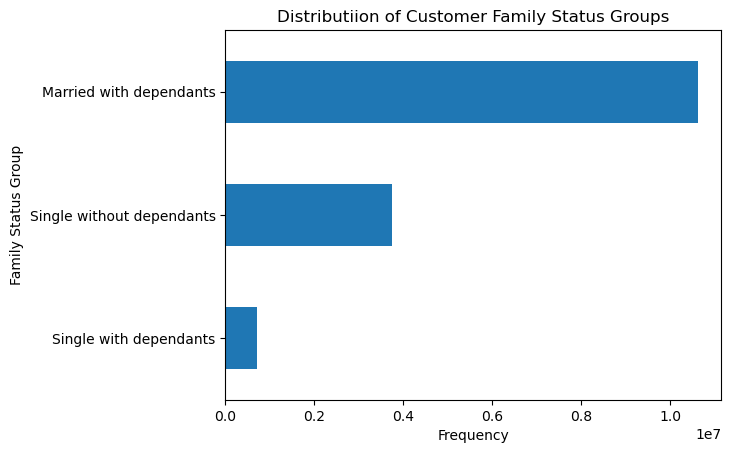

In [61]:
# Creating distribution chart for 'martial_dependant_group'
bar_marital_dep_group_distr = active_customers_departs_df['marital_dependant_group'].value_counts().sort_values().plot.barh()

plt.ylabel('Family Status Group')
plt.xlabel('Frequency')
plt.title('Distributiion of Customer Family Status Groups')

plt.xticks(rotation = 360)

In [63]:
#Exporting bar chart
bar_marital_dep_group_distr.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_marital_dep_group_distr.png'))


# Aggregate prices and order numbers for marital and dependant groups

In [64]:
# Aggregate 'order_number' and 'prices' for marital_dependant_group
active_customers_departs_df.groupby('marital_dependant_group').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number             prices              
                                  mean max min       mean      max  min
marital_dependant_group                                                
Married with dependants      17.838153  99   1  11.367474  99999.0  1.0
Single with dependants       18.172259  99   1  10.565909  99999.0  1.0
Single without dependants    17.893976  99   1  11.498744  99999.0  1.0

# Profile Based on Department

In [65]:
 #Frequency of products purchased by department
active_customers_departs_df['department'].value_counts()

department
produce       4429946
dairy eggs    2522991
snacks        1345048
beverages     1250576
frozen        1032797
               ...   
alcohol         69214
pets            44049
missing         31618
other           16598
bulk            16225
Name: count, Length: 21, dtype: int64

# Distribution chart for 'department'

Text(0.5, 1.0, 'Total Number of Products Purchased per Department')

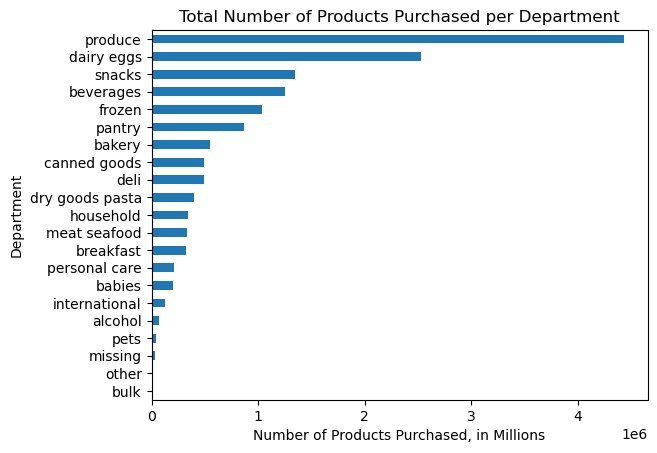

In [66]:
# Create bar chart to show amount of products purchased per department
bar_department_ords = active_customers_departs_df['department'].value_counts().sort_values().plot.barh()

plt.ylabel('Department')
plt.xlabel('Number of Products Purchased, in Millions')
plt.title('Total Number of Products Purchased per Department')

In [67]:
#Exporting bar chart
bar_department_ords.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_department_ords.png'))


In [68]:
# Checking income per department
active_customers_departs_df.groupby('department').prices.sum().sort_values(ascending = False)

department
dairy eggs    74927162.5
produce       35347844.1
beverages      9596923.0
frozen         7993713.1
pantry         6963190.3
                 ...    
alcohol         565886.2
pets            346640.8
missing         272445.4
bulk            135533.5
other           115549.6
Name: prices, Length: 21, dtype: float64

Text(0.5, 1.0, 'Total Income by Department')

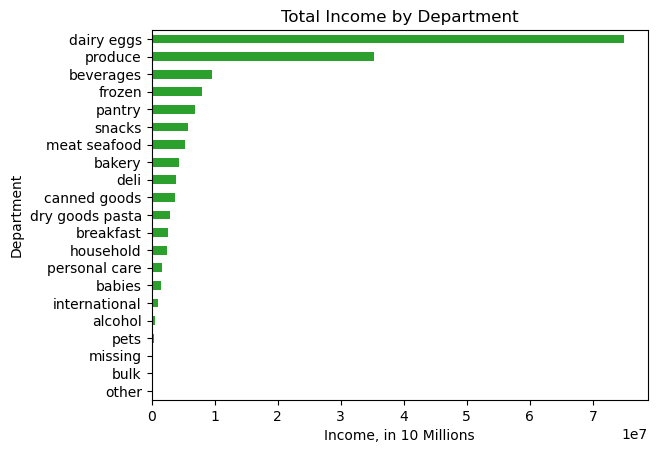

In [69]:
# Creating bar chart to show income per department
bar_depart_income = active_customers_departs_df.groupby('department').prices.sum().sort_values(ascending = True).plot(kind = 'barh', color = 'tab:green')

plt.ylabel('Department')
plt.xlabel('Income, in 10 Millions')
plt.title('Total Income by Department')


In [70]:
#Exporting bar chart
bar_depart_income.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_depart_income.png'))


Text(0.5, 1.0, 'Average Prices by Department')

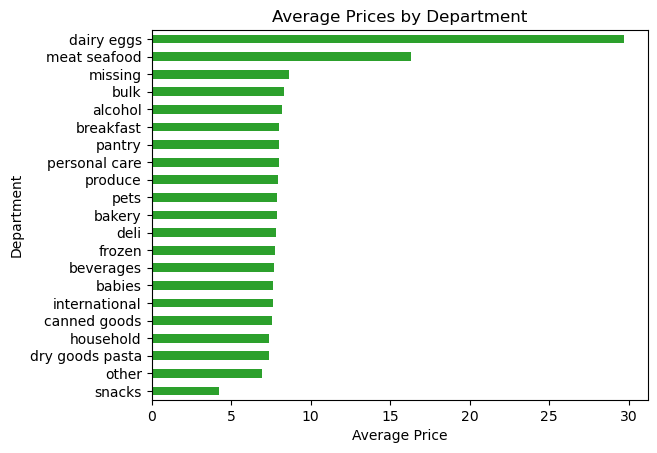

In [72]:
# Create bar chart to show avg prices per department
bar_depart_avg_price = active_customers_departs_df.groupby('department').prices.mean().sort_values(ascending = True).plot(kind = 'barh', color = 'tab:green')

plt.ylabel('Department')
plt.xlabel('Average Price')
plt.title('Average Prices by Department')

In [73]:
#Exporting bar chart
bar_depart_avg_price.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_depart_avg_price.png'))


# Aggregate prices and orders number for department

In [76]:
# Aggregating 'order_number' and 'prices' for departments
active_customers_departs_df.groupby('department').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number            prices           
                      mean max min      mean   max  min
department                                             
alcohol          16.051998  99   1  8.175892  15.0  1.0
babies           20.001347  99   1  7.663371  15.0  1.0
bakery           17.952939  99   1  7.856796  15.0  1.0
beverages        17.947543  99   1  7.674002  15.0  1.0
breakfast        17.496368  99   1  8.033070  14.9  1.0
...                    ...  ..  ..       ...   ...  ...
pantry           17.448075  99   1  8.014943  20.0  1.0
personal care    17.127050  99   1  8.001862  15.0  1.0
pets             15.754274  99   1  7.869436  15.0  1.0
produce          18.493827  99   1  7.979295  15.0  1.0
snacks           17.838068  99   1  4.269917   7.0  1.6

[21 rows x 6 columns]

# Create Crosstabs and visualizations

In [77]:
# Creating a crosstab between 'age_group' and 'department'
cross_age_department = pd.crosstab(active_customers_departs_df['department'], active_customers_departs_df['age_group'].sort_values(), dropna = False)

In [78]:
# Checking the output
cross_age_department

age_group,18-29 years old,30-49 years old,50-64 years old,65-81 years old
department,,,,
alcohol,13921,22393,16548,16352
babies,39060,63358,45112,52247
bakery,101747,173664,126667,146364
beverages,230466,390628,294223,335259
breakfast,62270,103495,76576,85023
...,...,...,...,...
pantry,162018,271611,204484,230663
personal care,38615,65288,48683,54584
pets,8860,13839,9462,11888


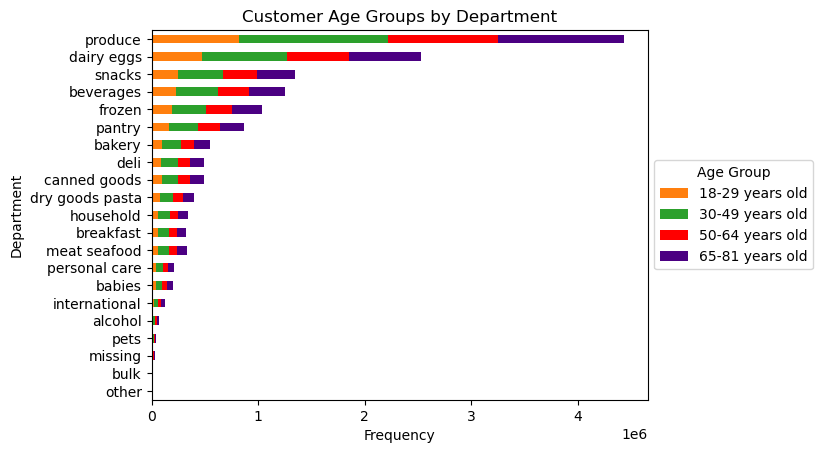

In [84]:
# Creating a stacked bar chart for age_group by department

bar_age_group_dep = cross_age_department.sort_values(by='30-49 years old', ascending=True).plot(kind='barh', stacked=True, color = ['tab:orange', 'tab:green', 'red', 'indigo'])
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Customer Age Groups by Department')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Age Group')

In [85]:
#Exporting bar chart
bar_age_group_dep.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_age_group_dep.png'))


# Create a cross between 'income_group' and 'department'

In [86]:
# Creating a crosstab between 'income_group' and 'department'
cross_income_department = pd.crosstab(active_customers_departs_df['department'], active_customers_departs_df['income_group'].sort_values(), dropna = False)

In [87]:
# Checking the output
cross_income_department

income_group,High income,Low income,Medium income
department,,,
alcohol,13886,15916,39412
babies,32544,36953,130280
bakery,89149,119775,339518
beverages,187658,337399,725519
breakfast,50605,85362,191397
...,...,...,...
pantry,140338,188320,540118
personal care,32275,48263,126632
pets,7764,9707,26578


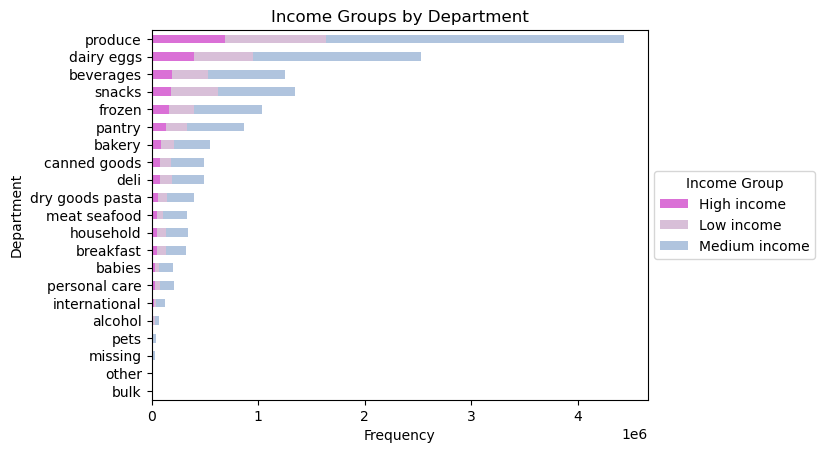

In [93]:
# Create stacked bar chart for income_group by department
bar_income_group_dep = cross_income_department.sort_values(by='Medium income', ascending=True).plot(kind='barh', stacked=True, color = ['orchid', 'thistle', 'lightsteelblue'])
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Income Groups by Department')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Income Group')

In [94]:
#Exporting bar chart
bar_income_group_dep.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_income_group_dep.png'))


# Create a crosstab between 'marital_dependant_group' and 'department'

In [95]:
# Creating a crosstab between 'marital_dependant_group' and 'department'
cross_marital_department = pd.crosstab(active_customers_departs_df['department'], active_customers_departs_df['marital_dependant_group'].sort_values(), dropna = False)

In [96]:
# Checking the output
cross_marital_department

marital_dependant_group,Married with dependants,Single with dependants,Single without dependants
department,,,
alcohol,47409,4397,17408
babies,139995,10027,49755
bakery,385385,25592,137465
beverages,882664,56047,311865
breakfast,231023,16133,80208
...,...,...,...
pantry,610741,41607,216428
personal care,145814,9579,51777
pets,30981,2241,10827


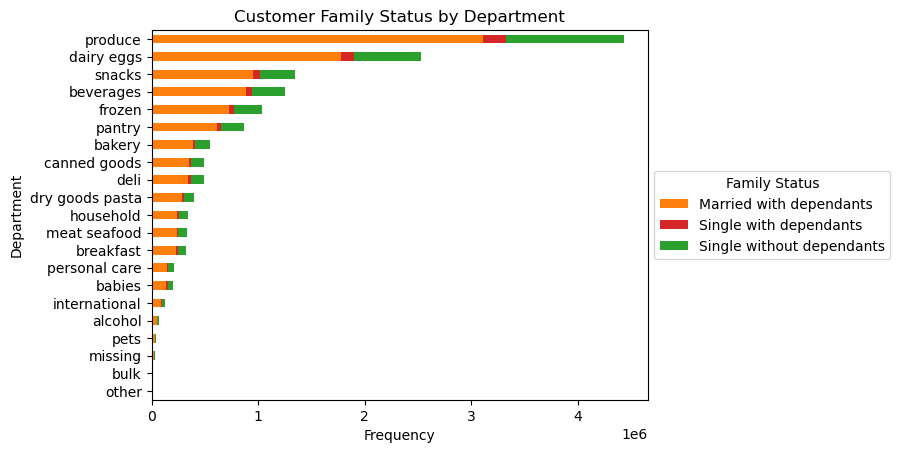

In [98]:
# Create stacked bar chart for marital_dependant_group by department
bar_marital_group_dep = cross_marital_department.sort_values(by='Married with dependants', ascending=True).plot(kind='barh', stacked=True, color = ['tab:orange', 'tab:red', 'tab:green'])
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Customer Family Status by Department')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Family Status')

In [99]:
#Exporting bar chart
bar_marital_group_dep.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_marital_group_dep.png'))

# Create a crosstab between 'age_group' and 'regions'


In [100]:
# Creating a crosstab between 'age_group' and 'regions'
cross_age_region = pd.crosstab(active_customers_departs_df['regions'], active_customers_departs_df['age_group'].sort_values(), dropna = False)

In [101]:
# Checking the output
cross_age_region

age_group,18-29 years old,30-49 years old,50-64 years old,65-81 years old
regions,,,,
Midwest,644676,1138569,828363,929177
Northeast,501476,854266,599245,730521
South,1243668,2018370,1539152,1746761
West,430496,725228,550065,614920


(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'West')])

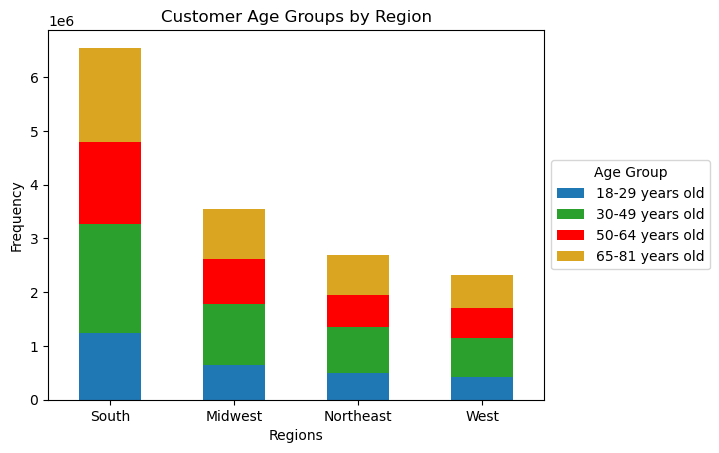

In [108]:
# Create stacked bar chart for age_group by region
bar_age_group_reg = cross_age_region.sort_values(by='30-49 years old', ascending=False).plot(kind='bar', stacked=True, color = ['tab:blue', 'tab:green', 'red', 'goldenrod'])

plt.ylabel('Frequency')
plt.xlabel('Regions')
plt.title('Customer Age Groups by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Age Group')

plt.xticks(rotation = 360)

In [109]:
#Exporting bar chart
bar_age_group_reg.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_age_group_reg.png'))

# Create a crosstab between 'income_group' and 'regions'


In [110]:
#Create a crosstab between 'income_group' and 'regions'
cross_income_reg = pd.crosstab(active_customers_departs_df['regions'], active_customers_departs_df['income_group'].sort_values(), dropna = False)

In [111]:
#Checking the output
cross_income_reg

income_group,High income,Low income,Medium income
regions,,,
Midwest,556423,810595,2173767
Northeast,418204,618378,1648926
South,1008996,1533258,4005697
West,364309,528768,1427632


(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'West')])

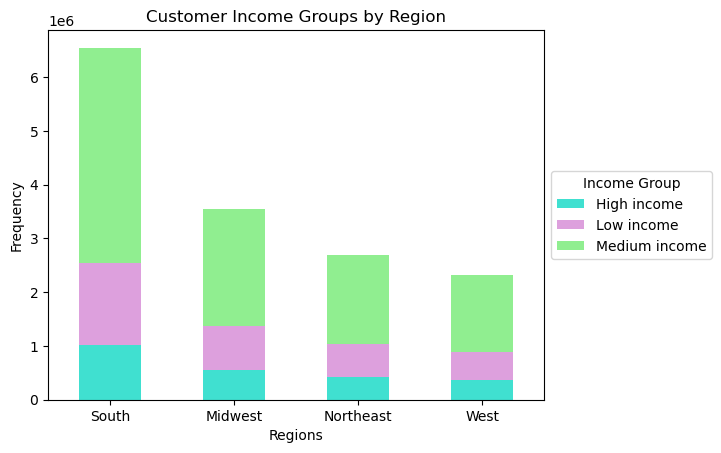

In [112]:
# Create stacked bar chart for regions by income_group
bar_income_group_reg = cross_income_reg.sort_values(by='Medium income', ascending=False).plot(kind='bar', stacked=True, color = ['turquoise', 'plum', 'lightgreen'])

plt.ylabel('Frequency')
plt.xlabel('Regions')
plt.title('Customer Income Groups by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Income Group')

plt.xticks(rotation = 360)

In [113]:
#Exporting bar chart
bar_income_group_reg.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_income_group_reg.png'))

# Create a crosstab between 'marital_dependant_group' and 'region'


In [115]:
#Creating a crosstab between 'marital_dependant_group' and 'region'
cross_marital_reg = pd.crosstab(active_customers_departs_df['regions'], active_customers_departs_df['marital_dependant_group'].sort_values(), dropna = False)


In [116]:
#checking the output
cross_marital_reg

marital_dependant_group,Married with dependants,Single with dependants,Single without dependants
regions,,,
Midwest,2477079,170376,893330
Northeast,1889548,113076,682884
South,4621603,331387,1594961
West,1632493,103323,584893


(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'West')])

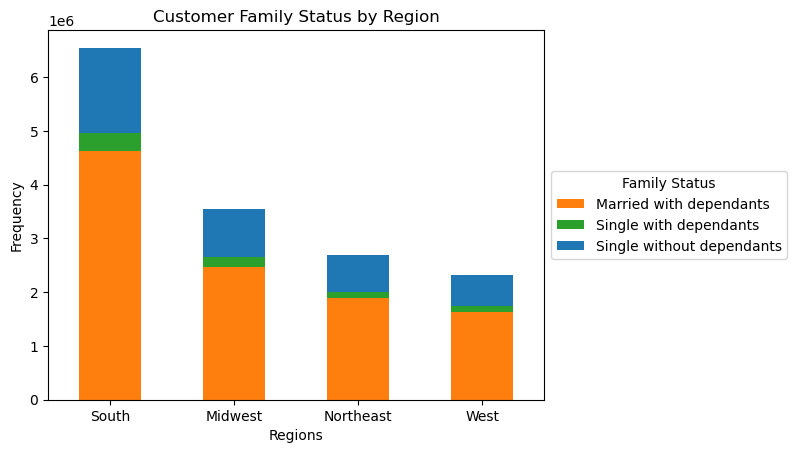

In [121]:
# Creating stacked bar chart for regions by marital_dependant_group
bar_marital_group_reg = cross_marital_reg.sort_values(by='Married with dependants', ascending=False).plot(kind='bar', stacked=True, color = ['tab:orange', 'tab:green', 'tab:blue'])

plt.ylabel('Frequency')
plt.xlabel('Regions')
plt.title('Customer Family Status by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Family Status')

plt.xticks(rotation = 360)

In [122]:
#Exporting bar chart
bar_marital_group_reg.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_marital_group_reg.png'))

# Create a crosstab between 'department' and 'regions'


In [123]:
# Create a crosstab between 'department' and 'regions'
cross_depart_reg = pd.crosstab(active_customers_departs_df['department'], active_customers_departs_df['regions'].sort_values(), dropna = False)

In [124]:
# Checking the output
cross_depart_reg

regions,Midwest,Northeast,South,West
department,,,,
alcohol,15673,12068,31215,10258
babies,46116,35871,87337,30453
bakery,128677,97786,238684,83295
beverages,291466,225903,542926,190281
breakfast,76367,58340,141390,51267
...,...,...,...,...
pantry,204127,152837,377961,133851
personal care,49044,36795,89729,31602
pets,9970,8127,17959,7993


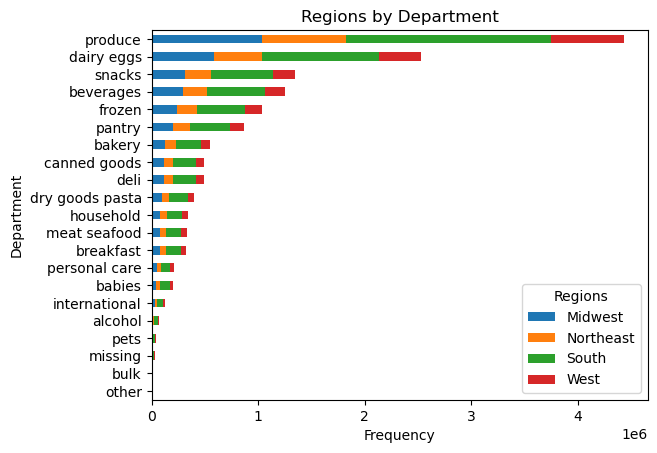

In [128]:
# Create stacked bar chart for region by department

bar_depart_reg = cross_depart_reg.sort_values(by='West', ascending=True).plot(kind='barh', stacked=True)
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Regions by Department')
plt.legend(title = 'Regions')

In [129]:
#Exporting bar chart
bar_depart_reg.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_depart_reg.png'))

# Create a crosstab between 'age_group' and 'marital_dependant_group'


In [130]:
# Create a crosstab between 'age_group' and 'marital_dependant_group'
cross_age_marital = pd.crosstab(active_customers_departs_df['age_group'], active_customers_departs_df['marital_dependant_group'].sort_values(), dropna = False)

In [131]:
# Checking the output
cross_age_marital

marital_dependant_group,Married with dependants,Single with dependants,Single without dependants
age_group,,,
18-29 years old,1409842,718162,692312
30-49 years old,3549366,0,1187067
50-64 years old,2625632,0,891193
65-81 years old,3035883,0,985496


(array([0, 1, 2, 3]),
 [Text(0, 0, '18-29 years old'),
  Text(1, 0, '30-49 years old'),
  Text(2, 0, '50-64 years old'),
  Text(3, 0, '65-81 years old')])

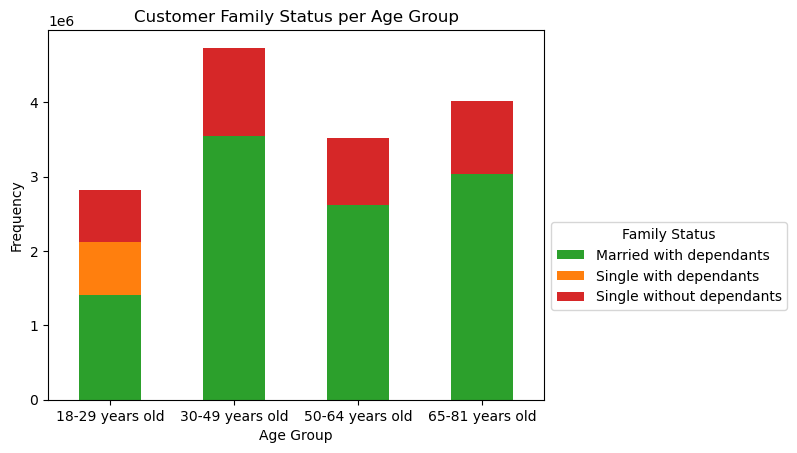

In [137]:
# Create stacked bar chart for age_group by region
bar_age_marital = cross_age_marital.plot(kind='bar', stacked=True, color = ['tab:green', 'tab:orange', 'tab:red'])
plt.ylabel('Frequency')
plt.xlabel('Age Group')
plt.title('Customer Family Status per Age Group')
plt.legend(bbox_to_anchor=(1.0, 0.5), title = 'Family Status')

plt.xticks(rotation = 360)

In [138]:
#Exporting bar chart
bar_age_marital.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_age_marital.png'))

In [140]:
# Exporting Final Dataframe 
newpath = 'preparedData'
active_customers_departs_df.to_pickle(os.path.join(newpath,'active_customers_departs.pkl'))